# **Using Deep AutoVIML for text dataset - Twitter Sentiment dataset**

## **Main References:**
* https://www.youtube.com/watch?v=IcpwNNNXsWE
* https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_NLP_Demo.ipynb
* Dataset used: https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech


In [ ]:
!pip install deep_autoviml --upgrade

In [1]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Imported deep_auto_viml. version=0.0.69
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [2]:
BATCHSIZE = 256
CLASSES = 10
EPOCHS = 25
NUM_TRIALS = 5

## **Data Loading**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!pwd

/content


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/My Drive/CMPE297_HW4_Text'

In [7]:
%cd /content/gdrive/My Drive/CMPE297_HW4_Text

/content/gdrive/My Drive/CMPE297_HW4_Text


In [12]:
!ls

kaggle.json  test.csv  text_twitter.zip  train.csv


In [11]:
!unzip text_twitter.zip

Archive:  text_twitter.zip
  inflating: test.csv                
  inflating: train.csv               


In [13]:
df = pd.read_csv('./train.csv')

In [14]:
df.head(1)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...


In [17]:
df.rename(columns={"label":"class"}, inplace=True)

In [18]:
df.head(1)

,id,class,tweet
0,1,0,@user when a father is dysfunctional and is s...


In [19]:
target = 'class'

In [20]:
df[target].value_counts()

0    29720
1     2242
Name: class, dtype: int64

## **Splitting into train and test datasets**

In [21]:
x = df.loc[:, df.columns!=target]
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
train, test = train_test_split(df, test_size=0.2, random_state=42)
print(train.shape, test.shape)

(25569, 3) (6393, 3)


* The storm tuner is an open source library used to build the model, with keras_model_type as "auto".
* Trying a CNN model for keras_model_type is also allowed, on using these keywords, we can build a slightly better/different model
* max_trials should be a slightly higher number, using a very small number may not give the best results. The higher the trials, more models will be tried.


In [27]:
keras_model_type =  "auto" ## always try "auto" first, then "basic", "deep", "big deep", "giant deep", "cnn1" etc.
keras_options = {"early_stopping": False, 'lr_scheduler': 'rlr'}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"storm", "max_trials":15, 'embedding_size': 50, 'cat_feat_cross_flag':False }


    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    lr_scheduler : rlr
    early_stopping : False
Using following model_options given as input:
    cat_feat_cross_flag : False
    max_trials : 15
    tuner : storm
    embedding_size : 50
Max Trials : 15. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 25569 rows, 2 cols
Data Set column

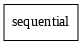


#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.0, 1: 7.56508875739645}
    original datasize = 25569, initial batchsize = 32
    Early stopping : False
    recommended steps per epoch = 10
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 40000
    number of classes = 2, output_activation = sigmoid
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 10, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = rlr

Splitting train into 80+20 percent: train and validation data
    Splitting validatio

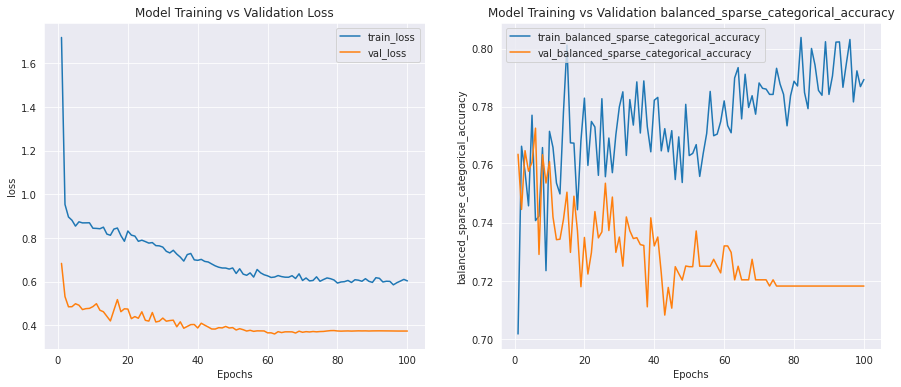

Time taken to train model (in mins) = 5
    Stopped epoch = 90
Held out data actuals shape: (256,)
    samples from label: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

Held out predictions shape:(256,)
    Sample predictions: [0 0 0 0 0 0 1 0 0 0]

###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: class
#################################################################


    Accuracy          = 85.5%
    Balanced Accuracy = 73.6%
    Precision         = 31.7%
    Average Precision = 63.8%
    Recall            = 59.1%
    F1 Score          = 41.3%
    ROC AUC           = 85.0%
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 6.279404e-06
    set learning rate using best model: 6.279404e-06
    max epochs for training = 90

Model not being saved since save_model_flag set to False...
6007

Saving vocab dictionary using pickle in text/auto/model_2021_11_01-21_47_20/artifacts/cat_vocab_dict.pickle...will take time...
    Saved pickle file in text/auto/model_2021_11_01-21_47_20/artifacts/cat_vocab_dict.pickle

Saving variable definitions file using pickle in text/auto/model_2021_11_01-21_47_20/artifacts/var_df.pickle...will take time...
    Saved pickle file in text/auto/model_2021_11_01-21_47_20/artifacts/var_df.pickle

Deep_Auto_ViML completed. Total time taken 

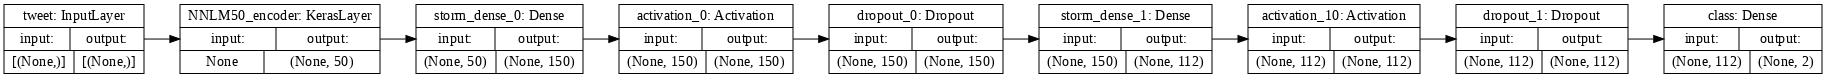

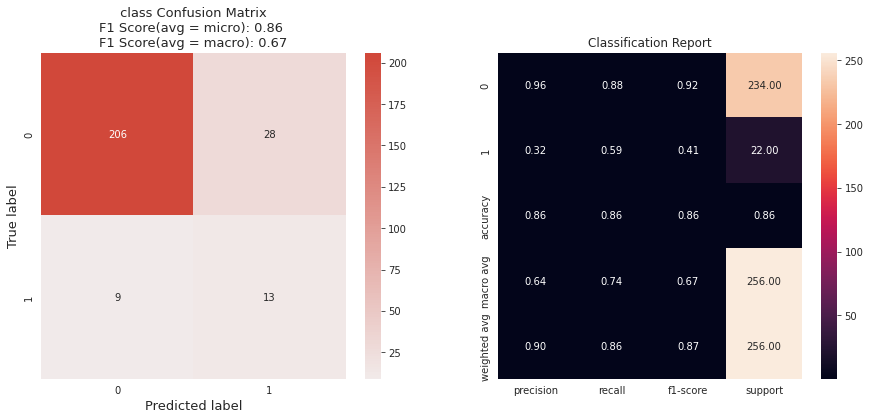

In [28]:
model, dicti = deepauto.fit(train, target, keras_model_type=keras_model_type, 
                            project_name='text',
                 save_model_flag=False, model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=2)

The following steps are happening:
* It summarizes all the options we have specified.
* It loads the data
* The deep autoVIML finds that there is an NLP column automatically and chooses an embedding size of 50. The original vocabulary size of the input was 409623 and its lowered down to 50 which was the inout.
* Goes into building a model and runs for the given max_trial times.
* The storm tuner trains the keras model - for 15 trials, hyperparameters are tuned (Dropout, optimizer, number of layers in the model etc.)
* The best model is then picked.


In [29]:
predictions = deepauto.predict(model, project_name='text', test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=dicti)


Loading deep_autoviml model from <tensorflow.python.keras.engine.functional.Functional object at 0x7f212abb5350> folder. This will take time...

Using <tensorflow.python.keras.engine.functional.Functional object at 0x7f212abb5350> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 6393
Alert! Modified column names to satisfy rules for column names in Tensorflow...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    3 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        1 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    number of binary = 0, cats = 0, high cats = 0, very high cats = 1
Distribution of integer columns in dat

In [30]:
predictions[1]

array([0, 0, 1, ..., 0, 0, 0])

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
print(classification_report(test[target].values,predictions[1]))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      5937
           1       0.27      0.62      0.37       456

    accuracy                           0.85      6393
   macro avg       0.62      0.74      0.64      6393
weighted avg       0.92      0.85      0.88      6393



## **CONCLUSION:**
The average accuracy achieved by the model is 85% with the Class=0 class accuracy being 92% and Class=1 being 37%